# Polar Region Plots

> Authors: Ashley Smith
>
> Abstract: Demonstrates access to (FAC, Te, Ne) measurements, and visualisation of them on Lon/Lat and MLT/QDLat plots.

See also:

 - https://github.com/pacesm/jupyter_notebooks/blob/master/AEBS/AEBS_AOB_FAC.ipynb

In [1]:
%load_ext watermark
%watermark -i -v -p viresclient,pandas,xarray,matplotlib,cartopy

2020-03-12T14:54:44+00:00

CPython 3.7.6
IPython 7.11.1

viresclient 0.6.0
pandas 0.25.3
xarray 0.15.0
matplotlib 3.1.2
cartopy 0.17.0


In [2]:
from viresclient import SwarmRequest
import datetime as dt
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
print("Collection names:")
print(SwarmRequest().available_collections("FAC", details=False))
print(SwarmRequest().available_collections("IPD", details=False), "\n")
print("FAC measurements:\n", SwarmRequest().available_measurements("FAC"))
print("IPD measurements:\n", SwarmRequest().available_measurements("IPD"))

Collection names:
{'FAC': ['SW_OPER_FACATMS_2F', 'SW_OPER_FACBTMS_2F', 'SW_OPER_FACCTMS_2F', 'SW_OPER_FAC_TMS_2F']}
{'IPD': ['SW_OPER_IPDAIRR_2F', 'SW_OPER_IPDBIRR_2F', 'SW_OPER_IPDCIRR_2F']} 

FAC measurements:
 ['IRC', 'IRC_Error', 'FAC', 'FAC_Error', 'Flags', 'Flags_F', 'Flags_B', 'Flags_q']
IPD measurements:
 ['Ne', 'Te', 'Background_Ne', 'Foreground_Ne', 'PCP_flag', 'Grad_Ne_at_100km', 'Grad_Ne_at_50km', 'Grad_Ne_at_20km', 'Grad_Ne_at_PCP_edge', 'ROD', 'RODI10s', 'RODI20s', 'delta_Ne10s', 'delta_Ne20s', 'delta_Ne40s', 'Num_GPS_satellites', 'mVTEC', 'mROT', 'mROTI10s', 'mROTI20s', 'IBI_flag', 'Ionosphere_region_flag', 'IPIR_index', 'Ne_quality_flag', 'TEC_STD']


## Fetch data separately from FAC and IPD collections over the same time window

In [4]:
# Set by IS0-8601 time:
start = "2018-05-01T00:00:00Z"
end = "2018-05-01T12:00:00Z"
# Setting by datetime objects:
# start = dt.datetime(2018, 5, 1, 0)
# end = dt.datetime(2018, 5, 1, 12)

In [5]:
request = SwarmRequest()
request.set_collection("SW_OPER_FACATMS_2F")
request.set_products(
    measurements=["FAC"],
    auxiliaries=["MLT", "QDLat", "QDLon"])
data = request.get_between(start, end)
ds_fac = data.as_xarray()
ds_fac

[1/1] Processing:  100%|███████████████████████████████████████████████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|█████████████████████████████████████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (2.813MB)


<xarray.Dataset>
Dimensions:     (Timestamp: 43200)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2018-05-01T00:00:00.500000 ... 2018-05-01T11:59:59.500000
Data variables:
    Spacecraft  (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    Radius      (Timestamp) float64 6.819e+06 6.819e+06 ... 6.806e+06 6.806e+06
    QDLat       (Timestamp) float64 -16.46 -16.52 -16.59 ... 76.31 76.36 76.41
    QDLon       (Timestamp) float64 90.27 90.26 90.26 ... 122.5 122.7 122.8
    Longitude   (Timestamp) float64 15.96 15.96 15.96 15.96 ... 29.91 30.0 30.09
    MLT         (Timestamp) float64 1.365 1.365 1.364 1.364 ... 15.19 15.2 15.21
    FAC         (Timestamp) float64 0.006507 -0.006002 ... -0.007964 0.7068
    Latitude    (Timestamp) float64 -4.918 -4.983 -5.047 ... 79.76 79.82 79.88
Attributes:
    Sources:         ['SW_OPER_FACATMS_2F_20180501T000000_20180501T235959_0301']
    MagneticModels:  []
    RangeFilters:    []

In [6]:
request = SwarmRequest()
request.set_collection("SW_OPER_IPDAIRR_2F")
request.set_products(
    measurements=["Ne", "Te"],
    auxiliaries=["MLT", "QDLat", "QDLon"])
data = request.get_between(start, end)
ds_ipd = data.as_xarray()
ds_ipd

[1/1] Processing:  100%|███████████████████████████████████████████████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|██████████████████████████████████████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (3.16MB)


<xarray.Dataset>
Dimensions:     (Timestamp: 43200)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2018-05-01T00:00:00.197000027 ... 2018-05-01T11:59:59.197000027
Data variables:
    Spacecraft  (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    Radius      (Timestamp) float64 6.819e+06 6.819e+06 ... 6.806e+06 6.806e+06
    QDLat       (Timestamp) float64 -16.42 -16.49 -16.55 ... 76.28 76.33 76.39
    Ne          (Timestamp) float64 8.814e+04 8.804e+04 ... 4.562e+04 4.832e+04
    QDLon       (Timestamp) float64 90.28 90.27 90.26 ... 122.4 122.6 122.8
    Longitude   (Timestamp) float64 15.96 15.96 15.96 ... 29.86 29.95 30.04
    Te          (Timestamp) float64 1.747e+03 1.752e+03 ... 2.639e+03 2.873e+03
    MLT         (Timestamp) float64 1.365 1.365 1.365 1.364 ... 15.18 15.2 15.21
    Latitude    (Timestamp) float64 -4.886 -4.951 -5.015 ... 79.72 79.79 79.85
Attributes:
    Sources:         ['SW_OPER_IPDAIRR_2F_20180501T000000_20180501T235959_0201']
    MagneticModels:  []
    RangeFilters:    []

### Why are some of the temperatures negative?

In [7]:
ds_ipd["Te"].where(ds_ipd["Te"] < 0, drop=True).head()  # NB only looking at first five entries

<xarray.DataArray 'Te' (Timestamp: 5)>
array([  -1657.87,  -34548.27,   -1694.56, -241857.02,   -7074.39])
Coordinates:
  * Timestamp  (Timestamp) datetime64[ns] 2018-05-01T00:19:36.197000027 ... 2018-05-01T00:24:35.197000027
Attributes:
    units:        K
    description:  Electron temperature, directly copied from the Langmuir pro...

## Reorganise the data

Note that the data are recorded at different sampling points:

In [8]:
ds_fac["Timestamp"]

<xarray.DataArray 'Timestamp' (Timestamp: 43200)>
array(['2018-05-01T00:00:00.500000000', '2018-05-01T00:00:01.500000000',
       '2018-05-01T00:00:02.500000000', ..., '2018-05-01T11:59:57.500000000',
       '2018-05-01T11:59:58.500000000', '2018-05-01T11:59:59.500000000'],
      dtype='datetime64[ns]')
Coordinates:
  * Timestamp  (Timestamp) datetime64[ns] 2018-05-01T00:00:00.500000 ... 2018-05-01T11:59:59.500000

In [9]:
ds_ipd["Timestamp"]

<xarray.DataArray 'Timestamp' (Timestamp: 43200)>
array(['2018-05-01T00:00:00.197000027', '2018-05-01T00:00:01.197000027',
       '2018-05-01T00:00:02.197000027', ..., '2018-05-01T11:59:57.197000027',
       '2018-05-01T11:59:58.197000027', '2018-05-01T11:59:59.197000027'],
      dtype='datetime64[ns]')
Coordinates:
  * Timestamp  (Timestamp) datetime64[ns] 2018-05-01T00:00:00.197000027 ... 2018-05-01T11:59:59.197000027

We could have alternatively fetched the data together directly with `request.set_collection("SW_OPER_FACATMS_2F", "SW_OPER_IPDAIRR_2F") ...` - in this case the server resolves the time discrepancy by using just the sampling times (and rate) of *the first collection given* (i.e. `"SW_OPER_FACATMS_2F"`) and interpolates the following collections onto the first time series with a nearest-neighbour method. This means that the `IPD` measurements would falsely be reported at the sampling times of the `FAC` measurements - this might not be a problem depending on your application, but we will avoid that issue here by accessing them as separate datasets.

We can perform an outer join to merge the datasets into one object, where `nan`'s fill the empty sampling times in each input dataset. Let's also set the appropriate variables as coordinates:

In [10]:
ds = ds_ipd.merge(ds_fac, join="outer")
coords = ["Latitude", "Longitude", "Radius", "QDLat", "QDLon", "MLT", "Spacecraft"]
ds = ds.set_coords(coords)
# NB: xarray merge does not handle the attributes
#  so we must merge these manually
ds = ds.assign_attrs({"Sources": ds_fac.Sources + ds_ipd.Sources})
ds

<xarray.Dataset>
Dimensions:     (Timestamp: 86400)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2018-05-01T00:00:00.197000027 ... 2018-05-01T11:59:59.500000
    Spacecraft  (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    Radius      (Timestamp) float64 6.819e+06 6.819e+06 ... 6.806e+06 6.806e+06
    QDLat       (Timestamp) float64 -16.42 -16.46 -16.49 ... 76.36 76.39 76.41
    QDLon       (Timestamp) float64 90.28 90.27 90.27 ... 122.7 122.8 122.8
    Longitude   (Timestamp) float64 15.96 15.96 15.96 15.96 ... 30.0 30.04 30.09
    MLT         (Timestamp) float64 1.365 1.365 1.365 1.365 ... 15.2 15.21 15.21
    Latitude    (Timestamp) float64 -4.886 -4.918 -4.951 ... 79.82 79.85 79.88
Data variables:
    Ne          (Timestamp) float64 8.814e+04 nan 8.804e+04 ... 4.832e+04 nan
    Te          (Timestamp) float64 1.747e+03 nan 1.752e+03 ... 2.873e+03 nan
    FAC         (Timestamp) float64 nan 0.006507 nan ... -0.007964 nan 0.7068
Attributes:
    Sources:         ['SW_OPER_FACATMS_2F_20180501T000000_20180501T235959_030...
    MagneticModels:  []
    RangeFilters:    []

We use this single object, `ds`, to access data in the rest of the notebook.

## Visualising the data

Let's visualise the measurements using the shortcut xarray plotting methods:

/opt/conda/lib/python3.7/site-packages/matplotlib/colors.py:972: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin


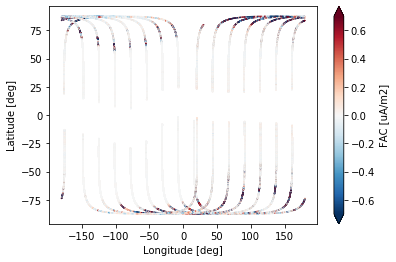

In [11]:
ds.plot.scatter(x="Longitude", y="Latitude", hue="FAC", s=0.2, robust=True);

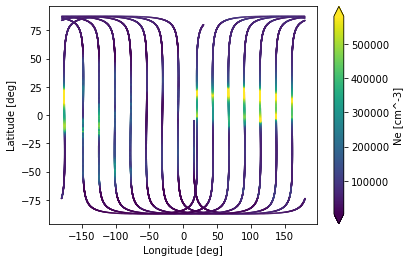

In [12]:
ds.plot.scatter(x="Longitude", y="Latitude", hue="Ne", s=0.2, robust=True);

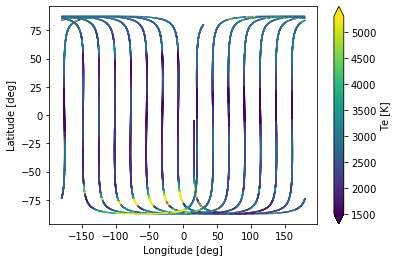

In [13]:
ds.plot.scatter(x="Longitude", y="Latitude", hue="Te", s=0.2, robust=True);

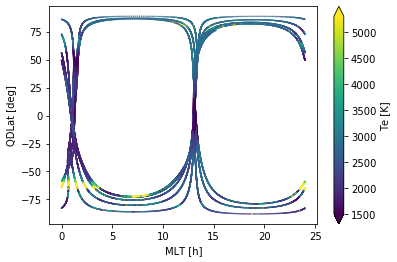

In [14]:
ds.plot.scatter(x="MLT", y="QDLat", hue="Te", s=0.2, robust=True);

## Geographic (Lon/Lat) and MLT/QDLat plots

To make more complex figures, it is usually necessary to drop down to the lower level matplotlib interface.

First let's set up figures onto which data can be plotted:

In [15]:
def _apply_circular_boundary(ax):
    """Make cartopy axes have round borders.
    See https://scitools.org.uk/cartopy/docs/v0.15/examples/always_circular_stereo.html
    
    Notes:
        Inline contour labels are still appearing outside the boundary
    """
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpl.path.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)

    
def create_axes_geo(title="", figsize=(10, 5)):
    """Create an empty geographic figure with North/South views
    
    Args:
        title (str)
        figsize (tuple): (width, height)
        
    Returns:
        matplotlib.figure.Figure, [GeoAxesSubplot, GeoAxesSubplot]
    """
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title, fontsize=15)
    # Geographic (lat/lon) views
    ax_N_geo = plt.subplot2grid(
        (1, 2), (0, 0),
        projection=ccrs.AzimuthalEquidistant(
            central_longitude=0.0, central_latitude=90.0,
            false_easting=0.0, false_northing=0.0, globe=None
        )
    )
    ax_S_geo = plt.subplot2grid(
        (1, 2), (0, 1),
        projection=ccrs.AzimuthalEquidistant(
            central_longitude=0.0, central_latitude=-90.0,
            false_easting=0.0, false_northing=0.0, globe=None
        )
    )
    ax_N_geo.set_extent([-180, 180, 50, 90], ccrs.PlateCarree())
    ax_S_geo.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
    for ax in [ax_N_geo, ax_S_geo]:
        _apply_circular_boundary(ax)
        ax.add_feature(cfeature.LAND, facecolor=(1.0, 1.0, 0.9))
        ax.add_feature(cfeature.OCEAN, facecolor=(0.9, 1.0, 1.0))
        ax.add_feature(cfeature.COASTLINE, edgecolor='silver')
    ax_N_geo.gridlines(ylocs=[50, 60, 70, 80, 90])
    ax_S_geo.gridlines(ylocs=[-90, -80, -70, -60, -50])
    ax_N_geo.set_title("North")
    ax_S_geo.set_title("South")
    return fig, [ax_N_geo, ax_S_geo]

def create_axes_mlt(title="", figsize=(10, 5)):
    """Create an empty MLT/QDLat figure with North/South views
    
    Args:
        title (str)
        figsize (tuple): (width, height)
        
    Returns:
        matplotlib.figure.Figure, [PolarAxesSubplot, PolarAxesSubplot]
    """
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title, fontsize=15)
    # QDLat/MLT views
    ax_N_mlt = plt.subplot2grid(
        (1, 2), (0, 0),
        projection="polar"
    )
    ax_S_mlt = plt.subplot2grid(
        (1, 2), (0, 1),
        projection="polar"
    )
    for ax in [ax_N_mlt, ax_S_mlt]:
        ax.set_ylim(0, 40)
        ax.set_yticks([0, 10, 20, 30, 40])
        ax.set_xticklabels(["%2.2i" % (x*12/np.pi) for x in ax.get_xticks()])
        ax.set_theta_zero_location("S")
        ax.set_yticklabels([])
    ax_N_mlt.set_title("North")
    ax_S_mlt.set_title("South")
    return fig, [ax_N_mlt, ax_S_mlt]

These can be used together with the xarray plotting methods which will make some decisions for us automatically (like setting up the colorbars):

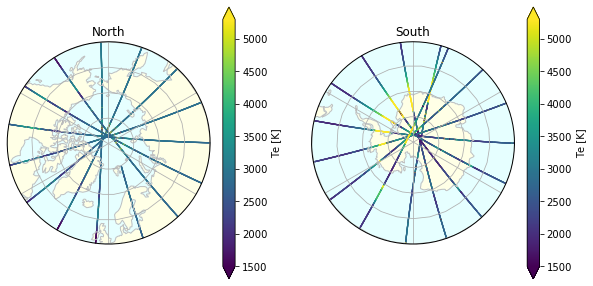

In [16]:
fig, axes = create_axes_geo()
for ax in axes:
    ds.plot.scatter(x="Longitude", y="Latitude", hue="Te", s=0.1,
                    ax=ax, transform=ccrs.PlateCarree(), robust=True)

(the MLT plot case is more complicated because of the transformations needed to plot data onto the polar projections)

To give more control over the plotting, we use matplotlib directly:

### Functions to help plot onto the axes specified above

In [17]:
def _subselect(ds, var, subselect_factor):
    _ds = ds.where(~np.isnan(ds[var]), drop=True)
    _ds = _ds.isel({"Timestamp": slice(0, -1, subselect_factor)})
    return _ds

def plot_geo(ax, ds, hemisphere="north", **kwargs):
    """
    kwargs must contain "var" to plot from ds
    
    Args:
        ax (matplotlib.axes)
        ds (xarray.Dataset)
        hemisphere (str): "north" or "south"
    """
    # Identify data variable to plot
    var = kwargs.pop("var")
    # Sub-select data by a given factor
    subselect = kwargs.pop("subselect", None)
    if subselect:
        _ds = _subselect(ds, var, subselect)
    else:
        _ds = ds
    # Select only either NH or SH data
    if hemisphere == "north":
        _ds = _ds.where(ds["Latitude"] > 50, drop=True)
    elif hemisphere == "south":
        _ds = _ds.where(ds["Latitude"] < -50, drop=True)
    # Do the actual plotting
    p = ax.scatter(_ds["Longitude"], _ds["Latitude"], c=_ds[var],
                   transform=ccrs.PlateCarree(), **kwargs)
    return p

def plot_mlt(ax, ds, hemisphere="north", **kwargs):
    """
    kwargs must contain "var" to plot from ds
    
    Args:
        ax (matplotlib.axes)
        ds (xarray.Dataset)
        hemisphere (str): "north" or "south"
    """
    # Identify data variable to plot
    var = kwargs.pop("var")
    # Sub-select data by a given factor
    subselect = kwargs.pop("subselect", None)
    if subselect:
        _ds = _subselect(ds, var, subselect)
    else:
        _ds = ds
    # Select only either NH or SH data
    if hemisphere == "north":
        _ds = _ds.where(ds["QDLat"] > 50, drop=True)
        h = 1
    elif hemisphere == "south":
        _ds = _ds.where(ds["QDLat"] < -50, drop=True)
        h = -1
    # Transformation to the polar coordinates
    def _scatter(x, y, *args, **kwargs):
        return ax.scatter(x*(np.pi/12), 90 - y*h, *args, **kwargs)
    p = _scatter(_ds["MLT"], _ds["QDLat"], c=_ds[var],
                 **kwargs)
    return p

### Plot Te on both GEO and MLT views

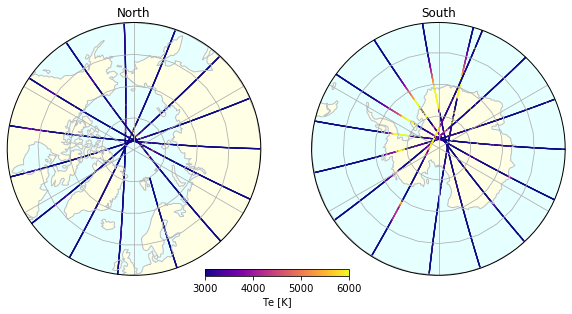

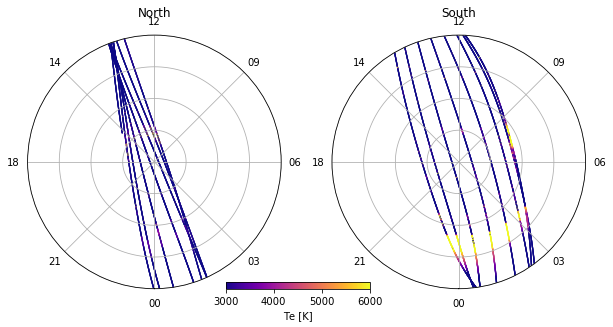

In [18]:
# Create the bare figures
fig_geo, (ax_N_geo, ax_S_geo) = create_axes_geo()
fig_mlt, (ax_N_mlt, ax_S_mlt) = create_axes_mlt()

# Set the parameters to control the plotting
options = dict(
    var="Te",
    cmap=mpl.cm.plasma,
    norm=mpl.colors.Normalize(vmin=3e3, vmax=6e3),
    s=0.1,
)

# Plot onto each axes
plot_geo(ax_N_geo, ds, hemisphere="north", **options)
plot_geo(ax_S_geo, ds, hemisphere="south", **options)
plot_mlt(ax_N_mlt, ds, hemisphere="north", **options)
plot_mlt(ax_S_mlt, ds, hemisphere="south", **options)

# Add colorbars
for fig in [fig_geo, fig_mlt]:
    cax = fig.add_axes([0.4, 0.15, 0.2, 0.02])
    var = options["var"]
    label = f"{var} [{ds[var].units}]"
    cbar = mpl.colorbar.ColorbarBase(cax,
                                     cmap=options["cmap"],
                                     norm=options["norm"],
                                     orientation='horizontal',
    #                                  ticks=[norm.vmin, (norm.vmax+norm.vmin)/2, norm.vmax],
                                     label=label)

### Plot both FAC and Ne on one figure

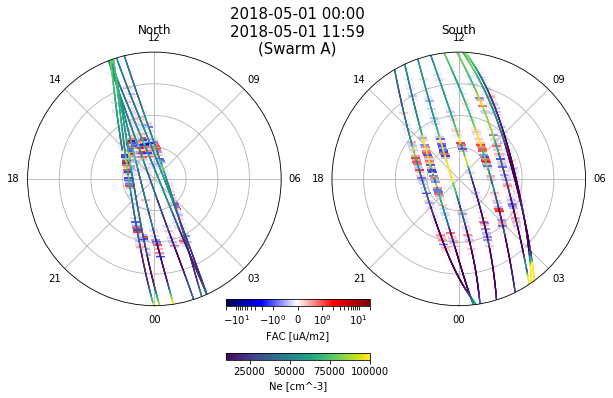

In [19]:
# set up title based on approx start/end times
time1 = ds["Timestamp"][0].values
time2 = ds["Timestamp"][-1].values
def format_dt64(dt64, form="%Y-%m-%d %H:%M"):
    # Convert numpy.datetime64 [ns] -> datetime
    time = dt.datetime.utcfromtimestamp(dt64.astype(int) * 1e-9)
    return time.strftime(form)
spacecraft = ds["Spacecraft"][0].values
title = f"{format_dt64(time1)}\n{format_dt64(time2)}\n(Swarm {spacecraft})"

fig, (ax_N_mlt, ax_S_mlt) = create_axes_mlt(title=title)

options_Ne = dict(
    var="Ne",
    cmap=mpl.cm.viridis,
    norm=mpl.colors.Normalize(vmin=10e3, vmax=100e3),
    s=0.1, zorder=2,
)
# - scatterplot point size (s) and data rate (subselect)
#     need to be balanced to make them legible
# - zorder controls the layers of plots (which one goes on top)
# - Try a horizontal line as the marker
#     (only works when the satellite tracks run vertically)
#     ref: https://matplotlib.org/3.1.0/api/markers_api.html
options_FAC = dict(
    var="FAC", subselect=10,
    cmap=mpl.cm.seismic,
    norm=mpl.colors.SymLogNorm(linthresh=1, linscale=1, vmin=-20,vmax=20),
    s=80, zorder=1, marker="_",
)

for options in [options_FAC, options_Ne]:
    plot_mlt(ax_N_mlt, ds, hemisphere="north", **options)
    plot_mlt(ax_S_mlt, ds, hemisphere="south", **options)

# Set colorbar locations
cax1 = fig.add_axes([0.4, 0.15, 0.2, 0.02])
cax2 = fig.add_axes([0.4, 0.0, 0.2, 0.02])
# Draw colorbars
for cax, options in zip([cax1, cax2], [options_FAC, options_Ne]):
    var = options["var"]
    label = f"{var} [{ds[var].units}]"
    cbar = mpl.colorbar.ColorbarBase(cax,
                                     cmap=options["cmap"],
                                     norm=options["norm"],
                                     orientation='horizontal',
                                     label=label)

next steps:

- visualisations of auroral oval boundaries etc, from AEBS products:
 - https://github.com/pacesm/jupyter_notebooks/blob/master/AEBS/AEBS_AOB_FAC.ipynb
- use `cartopy.feature.nightshade` to show terminator (for shorter time periods)
 - https://scitools.org.uk/cartopy/docs/latest/gallery/aurora_forecast.html
